In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 34.2 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/item_data_fixspell.csv').dropna()
df.shape

(74438, 5)

In [ ]:
df['review'][5]

'설명서도 잘 되어있고 부속품들도 세심하게 알아보기 쉽게 너무 잘되어 있어서 조립하는 게 쉽고 재밌어요~^^ 가격에 비해 착하고 예쁜 상품입니다'

리뷰의 최대 길이 : 537
리뷰의 평균 길이 : 58.875641473440986


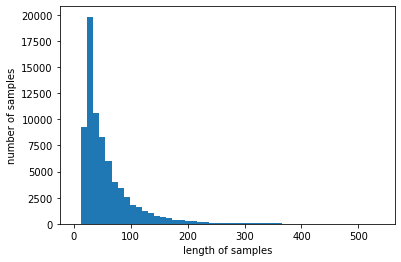

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in df['review']))
print('리뷰의 평균 길이 :',sum(map(len, df['review']))/len(df['review']))
plt.hist([len(review) for review in df['review']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    words = [s for s, t in tagged if t in ['Adjective', 'Determiner', 'Exlamation', 'Hashtag', 'KoreanParticle', 'Noun',
                                           'Verb', 'Adverb'] and len(s) > 1]
    return words

In [ ]:
def tokenize(df):
    tokenizer = Okt()
    processed_data = []
    for sent in tqdm(df['review']):
        processed_data.append(get_nouns(tokenizer, sent))

    return processed_data

In [ ]:
#okt -> han-spell로 띄어쓰기 교정을 어느 정도 완료를 했기 때문에 
from konlpy.tag import Okt
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]","")

pos_list = tokenize(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 74438/74438 [03:58<00:00, 312.51it/s]


In [ ]:
df = df.reset_index().drop(['index'], axis = 1)

In [ ]:
df

,Unnamed: 0,product_name,rates,review,label
0,1,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,4.3,배송은 빨랐고 조립하는 게 되게 체계적으로 돼있어서 놀랐어요 내부 공간은 넓은데 생...,1
1,2,[7%쿠폰]FIHA 서랍장 4.1단 6colors\n화이트 2981.3310,5.0,조립도 너무 쉽게 했고 가격 대비 괜찮은 것 같습니다,1
2,3,[7%쿠폰]FIHA 서랍장 5단 6colors\n화이트 2269.3022,1.8,음 겉보기만 이쁩니다 오늘의 집에서 구입한 것 중 가장 후회해요 이유는 서랍이 잘 ...,0
3,4,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,5.0,예뻐요 조립이 첨엔 어려울까 싶어서 걱정했는데 하다 보니 할만해요 크고 좋네요 잘...,1
4,5,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n미들브라운 6098...,4.8,설명서도 잘 되어있고 부속품들도 세심하게 알아보기 쉽게 너무 잘되어 있어서 조립하는...,1
...,...,...,...,...,...
74433,74527,[7%쿠폰]LEITER 선반 4단 2size\n그레이,4.8,한쪽 면이 찌그러져 왔지만 그래도 좋았습니다,1
74434,74528,[7%쿠폰]LEITER 선반 4단 2size\n그레이,4.8,그레이랑 화이트 컬러 샀는데 그레이가 생각보다 톤 다운된 그레이라 너무 이뻐요 화이...,1
74435,74529,[7%쿠폰]LEITER 선반 4단 2size\n매트실버,4.0,잘 쓰고 있어요 오램만에 어플 키니 리부 남겨라 하네요 ㅋㅋㅋ 좋아요,1
74436,74530,[7%쿠폰]LEITER 선반 4단 2size\n화이트,4.8,올려놓는 선반 부분이 힘이 없다 보니까 가벼운 물건 올려놓으면 지탱하는 게 위태위태...,1


In [ ]:
for i, words in tqdm(enumerate(pos_list)):
    df.loc[i, 'pos'] = ' '.join(pos_list[i])

74438it [02:24, 514.25it/s]


In [ ]:
df

,Unnamed: 0,product_name,rates,review,label,pos
0,1,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,4.3,배송은 빨랐고 조립하는 게 되게 체계적으로 돼있어서 놀랐어요 내부 공간은 넓은데 생...,1,배송 빨랐고 조립 하는 되게 체계 돼있어서 놀랐어요 내부 공간 넓은데 생각 사용 불...
1,2,[7%쿠폰]FIHA 서랍장 4.1단 6colors\n화이트 2981.3310,5.0,조립도 너무 쉽게 했고 가격 대비 괜찮은 것 같습니다,1,조립 너무 쉽게 했고 가격 대비 괜찮은 같습니다
2,3,[7%쿠폰]FIHA 서랍장 5단 6colors\n화이트 2269.3022,1.8,음 겉보기만 이쁩니다 오늘의 집에서 구입한 것 중 가장 후회해요 이유는 서랍이 잘 ...,0,겉보기 이쁩니다 오늘 구입 가장 후회 해요 이유 서랍 열립니다 닫힙니다 ㅜㅜ 열고 ...
3,4,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n캄포어베니어 385...,5.0,예뻐요 조립이 첨엔 어려울까 싶어서 걱정했는데 하다 보니 할만해요 크고 좋네요 잘...,1,예뻐요 조립 어려울까 싶어서 걱정 했는데 하다 보니 만해 크고 좋네요 쓸게요
4,5,[7%쿠폰]POLABO 미니수납장 넓은 2문 SHM4262SL\n미들브라운 6098...,4.8,설명서도 잘 되어있고 부속품들도 세심하게 알아보기 쉽게 너무 잘되어 있어서 조립하는...,1,설명 서도 되어있고 부속품 세심 하게 알아보기 쉽게 너무 되어 있어서 조립 하는 쉽...
...,...,...,...,...,...,...
74433,74527,[7%쿠폰]LEITER 선반 4단 2size\n그레이,4.8,한쪽 면이 찌그러져 왔지만 그래도 좋았습니다,1,한쪽 찌그러져 왔지만 그래도 좋았습니다
74434,74528,[7%쿠폰]LEITER 선반 4단 2size\n그레이,4.8,그레이랑 화이트 컬러 샀는데 그레이가 생각보다 톤 다운된 그레이라 너무 이뻐요 화이...,1,그레이 화이트 컬러 샀는데 그레이 생각 다운 그레이 너무 이뻐요 화이트 밝은 벽지 ...
74435,74529,[7%쿠폰]LEITER 선반 4단 2size\n매트실버,4.0,잘 쓰고 있어요 오램만에 어플 키니 리부 남겨라 하네요 ㅋㅋㅋ 좋아요,1,쓰고 있어요 어플 리부 남겨라 하네요 ㅋㅋㅋ 좋아요
74436,74530,[7%쿠폰]LEITER 선반 4단 2size\n화이트,4.8,올려놓는 선반 부분이 힘이 없다 보니까 가벼운 물건 올려놓으면 지탱하는 게 위태위태...,1,올려놓는 선반 부분 없다 가벼운 물건 올려놓으면 지탱 하는 태위 태해 보이 이쁨


In [ ]:
df.to_csv('/content/drive/MyDrive/item_data_postagging.csv')